<a href="https://colab.research.google.com/github/nazaninbondarian/MachineLearning2024/blob/main/Final/Final3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd ..

In [1]:
import os

# Define the folder name
folder_name = "Data"

# Check if the folder already exists, and create it if not
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Commented out IPython magic to ensure Python compatibility.
%cd Data

/content/Data


In [2]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1rbloSFLDmnSwjNjP07jqupDyRbzgeBF9

  Attempting uninstall: gdown
    Found existing installation: gdown 5.1.0
    Uninstalling gdown-5.1.0:
      Successfully uninstalled gdown-5.1.0
Downloading...
From: https://drive.google.com/uc?id=1rbloSFLDmnSwjNjP07jqupDyRbzgeBF9
To: /content/Data/MJMusicDataset.csv
100% 815k/815k [00:00<00:00, 111MB/s]


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Read the CSV file into a DataFrame
df = pd.read_csv('/content/Data/MJMusicDataset.csv')
df.head()

,name,dastgah,instrument,zero_corssing,spectral_centroid_mean,spectral_centroid_var,spectral_rolloff_mean,spectral_rolloff_var,chroma_1_mean,chroma_2_mean,...,mfcc_11_var,mfcc_12_var,mfcc_13_var,mfcc_14_var,mfcc_15_var,mfcc_16_var,mfcc_17_var,mfcc_18_var,mfcc_19_var,mfcc_20_var
0,ney-mahoor-ebrahimi .mp3,D_2,I_4,65545,1938.040517,303472.4474,2815.166310,1.754412e+06,0.515210,0.158007,...,482.619965,274.530334,257.260315,200.793167,177.008484,89.304535,49.159683,83.412254,154.657501,417.060425
1,Mohammad_Shojaei_nei_Mahoor.mp3,D_2,I_4,59788,1956.981873,774951.2677,2971.032035,2.082504e+06,0.209722,0.335278,...,435.338196,289.941559,337.219269,266.507416,256.131317,153.390289,90.073257,120.354729,206.031006,267.015015
2,Arash_Samimi_nei_Mahoor.mp3,D_2,I_4,85072,2735.525193,575671.7929,4268.615855,2.663909e+06,0.105867,0.108526,...,299.526794,226.705948,163.451355,140.664673,104.658630,72.048088,53.397228,83.085548,190.668487,331.626526
3,19 sarebaang mahoor.mp3,D_2,I_4,89980,2629.389833,406198.9319,4071.233715,1.005496e+06,0.153988,0.098157,...,305.978638,154.510696,281.793976,348.872650,156.062454,85.470512,45.904568,120.363800,370.077820,306.180878
4,Amjadian.mp3,D_2,I_4,58134,1659.262559,332341.1003,2789.041468,8.496746e+05,0.077795,0.036009,...,81.764854,106.146141,103.081779,85.252548,90.831291,150.201111,332.417633,299.858795,177.197845,186.112488


In [6]:
X = df.drop(['name', 'dastgah', 'instrument'], axis=1).values
y = df['dastgah'].values

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=76)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

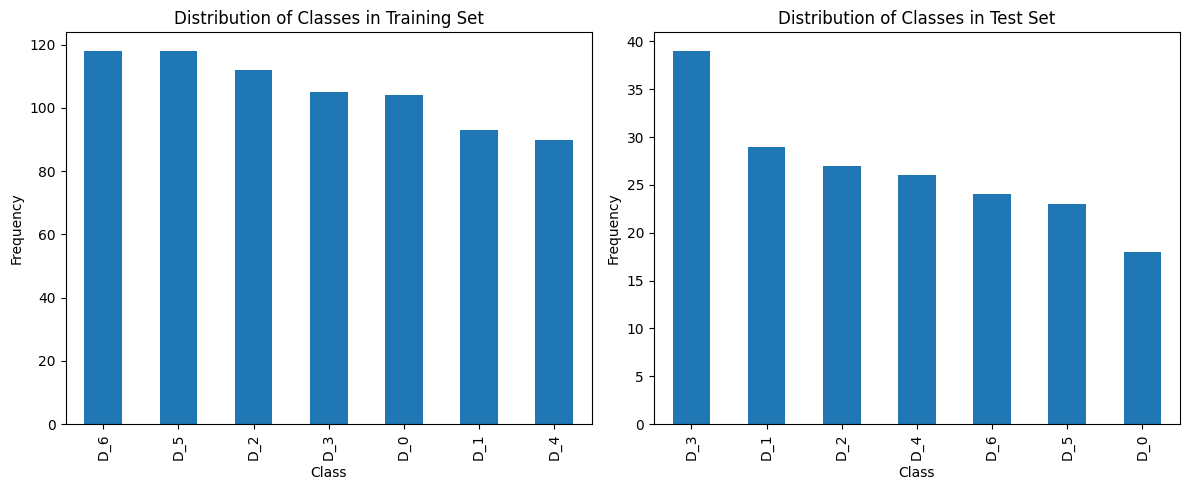

In [15]:
import seaborn as sns
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
# Convert to Pandas Series
series_train = pd.Series(y_train)
series_train.value_counts().plot(kind='bar')
plt.title('Distribution of Classes in Training Set')
plt.xlabel('Class')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
# Convert to Pandas Series
series_test = pd.Series(y_test)
series_test.value_counts().plot(kind='bar')
plt.title('Distribution of Classes in Test Set')
plt.xlabel('Class')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

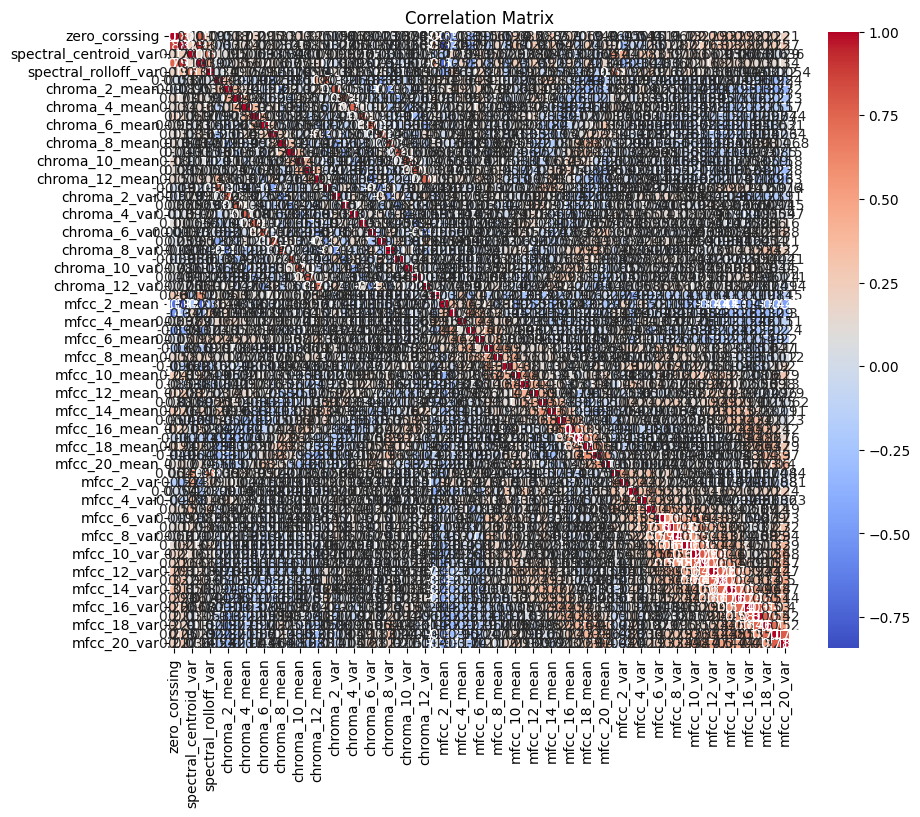

In [33]:
plt.figure(figsize=(10, 8))
Xcorr = df.drop(['name', 'dastgah', 'instrument'], axis=1)
correlation_matrix = Xcorr.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [53]:
from sklearn.feature_selection import SelectKBest, f_classif
k_best = SelectKBest(score_func=f_classif, k=10)
X_train_k_best = k_best.fit_transform(X_train_scaled, y_train)
X_test_k_best = k_best.transform(X_test_scaled)

In [88]:
from sklearn.svm import SVC

clf = SVC(kernel='linear', C=0.5 ,decision_function_shape='ovo', tol=0.0001, max_iter=2000)
clf.fit(X_train_k_best, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(C=0.5, decision_function_shape='ovo', kernel='linear', max_iter=2000,
    tol=0.0001)

In [89]:
# Make predictions
y_pred = clf.predict(X_test_k_best)

In [90]:
print("Support vectors index:", clf.support_)
print("Number of support vectors:", clf.n_support_)
print("Support vectors:", clf.support_vectors_)

Support vectors index: [  2   9  18  22  24  34  42  57  62  64  69  71  96 117 129 131 132 184
 189 194 195 199 202 221 222 225 228 235 240 245 249 251 253 255 258 264
 275 277 280 281 286 296 302 309 310 328 334 338 346 361 362 368 372 377
 384 389 391 395 406 416 424 432 454 457 462 465 473 480 481 490 493 498
 507 515 517 530 547 559 564 566 582 589 613 616 623 624 626 627 636 639
 642 658 663 665 669 681 707 718 720 733 734 736 737 738   0   3   4   5
   7  19  44  59  63  66  85  93  98 103 110 115 120 134 158 169 178 179
 186 190 205 206 207 243 274 283 297 301 305 317 324 325 341 356 374 376
 378 387 393 404 408 412 428 430 434 439 441 442 443 445 449 451 471 474
 486 497 521 526 549 550 554 557 558 561 569 576 580 584 593 601 609 610
 622 629 633 640 641 648 650 661 668 678 680 684 722 724  15  27  28  33
  38  55  74  92 112 119 126 130 136 145 148 152 156 159 164 165 171 173
 174 175 180 182 183 187 191 197 200 208 212 216 233 236 237 244 261 262
 267 273 278 282 284 289 294

Accuracy: 0.24731182795698925
Classification Report:
               precision    recall  f1-score   support

         D_0       0.04      0.06      0.05        18
         D_1       0.40      0.21      0.27        29
         D_2       0.26      0.33      0.29        27
         D_3       0.48      0.26      0.33        39
         D_4       0.00      0.00      0.00        26
         D_5       0.14      0.30      0.19        23
         D_6       0.31      0.54      0.39        24

    accuracy                           0.25       186
   macro avg       0.23      0.24      0.22       186
weighted avg       0.26      0.25      0.23       186

Confusion Matrix:
 [[ 1  2  6  0  0  5  4]
 [ 3  6  2  3  1  6  8]
 [ 4  3  9  3  0  6  2]
 [ 6  0  6 10  0 10  7]
 [ 2  1  6  0  0 13  4]
 [ 3  2  6  1  0  7  4]
 [ 4  1  0  4  0  2 13]]


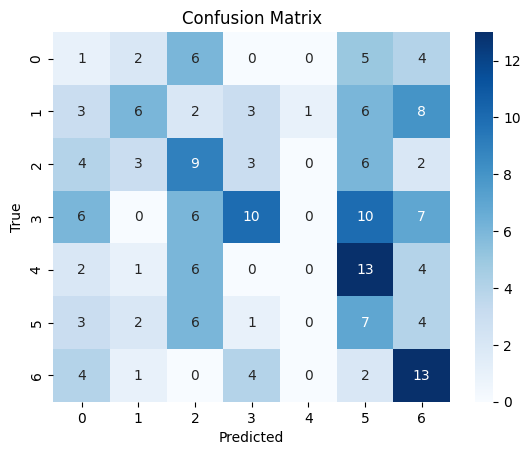

In [91]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize the results
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Support vectors index: [  2   9  18  22  24  34  42  57  62  64  69  71  96 117 129 131 132 184
 189 194 195 199 202 221 222 225 228 235 240 245 249 251 253 255 258 264
 275 277 280 281 286 296 302 309 310 328 334 338 346 361 362 368 372 377
 384 389 391 395 406 416 424 432 454 457 462 465 473 480 481 490 493 498
 507 515 517 530 547 559 564 566 582 589 613 616 623 624 626 627 636 639
 642 658 663 665 669 681 707 718 720 733 734 736 737 738   0   3   4   5
   7  19  44  59  63  66  82  85  93  98 103 110 115 120 121 134 158 169
 178 179 186 190 205 206 207 243 274 283 290 297 301 305 317 324 325 341
 356 374 376 378 387 393 404 408 412 428 430 434 439 441 442 443 445 449
 451 471 474 486 497 521 526 549 550 554 557 558 561 569 576 580 584 593
 601 609 610 622 629 633 640 641 648 650 661 668 678 680 684 722 724  13
  15  27  28  31  33  38  55  74  92 112 119 126 130 136 145 148 152 156
 159 164 165 171 173 174 175 180 182 183 187 191 197 200 208 212 216 233
 236 237 244 261 262 267 273

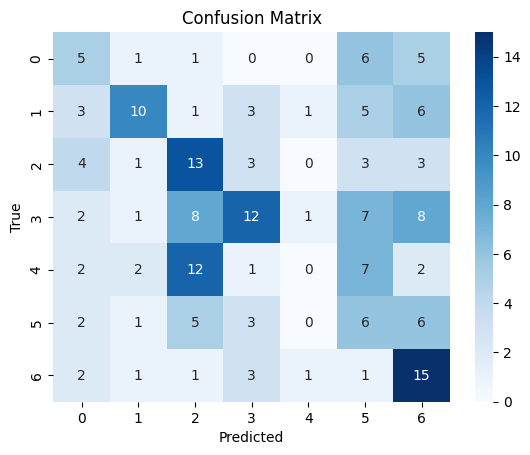

In [107]:
clf1 = SVC(kernel='rbf', C=0.8 ,decision_function_shape='ovo', tol=0.0001, max_iter=2000)
clf1.fit(X_train_k_best, y_train)
# Make predictions
y_pred1 = clf1.predict(X_test_k_best)
print("Support vectors index:", clf1.support_)
print("Number of support vectors:", clf1.n_support_)
print("Support vectors:", clf1.support_vectors_)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred1))
print("Classification Report:\n", classification_report(y_test, y_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))

# Visualize the results
sns.heatmap(confusion_matrix(y_test, y_pred1), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [104]:
from sklearn.model_selection import KFold
# Initialize SVM classifier
svm = SVC()

# Define parameter grid for Grid Search
param_grid = {
    'C': [1e-2, 0.1, 0.8, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf','poly']
}

# Set up K-Fold Cross-Validation with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=76)

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=kf)
grid_search.fit(X_train_k_best, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Score:", grid_search.best_score_)

# Evaluate the model on the test set
test_score = grid_search.score(X_test_k_best, y_test)
print("Test Set Accuracy:", test_score)

Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best Cross-validation Score: 0.34324324324324323
Test Set Accuracy: 0.26881720430107525


Support vectors index: [  2   9  18  22  24  34  42  57  62  64  69  71  96 117 129 131 132 184
 189 194 195 199 202 221 222 225 228 235 240 249 251 255 258 264 275 277
 280 281 286 296 302 309 310 328 334 338 346 361 362 368 372 377 384 389
 391 395 406 416 424 432 454 457 462 465 473 480 481 490 493 498 507 515
 517 530 547 559 564 566 582 589 613 616 623 624 626 627 636 639 642 658
 663 665 669 681 707 718 720 733 734 736 737 738   0   3   4   5   7  19
  44  59  63  66  85  93  98 103 110 115 120 121 134 158 178 179 186 190
 205 206 207 243 274 283 290 297 301 305 324 325 341 356 374 376 378 387
 393 404 408 412 428 430 434 439 441 442 443 445 449 451 471 474 497 521
 526 549 550 554 557 558 561 569 576 580 584 593 601 609 610 622 629 633
 640 641 648 650 661 668 678 680 684 722 724  13  15  27  31  33  38  55
  74  92 112 119 126 130 136 145 148 152 156 159 164 165 171 173 174 175
 180 182 183 187 191 197 200 208 212 216 233 236 237 261 262 267 273 278
 282 284 289 294 300 306 307

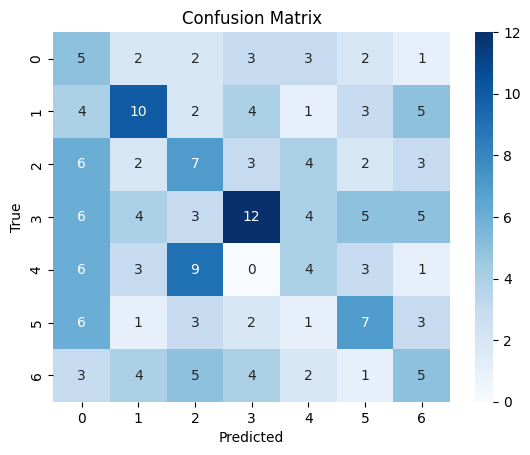

In [108]:
clf2 = SVC(kernel='rbf', C=10 , gamma=0.1, decision_function_shape='ovo', tol=0.0001, max_iter=2000)
clf2.fit(X_train_k_best, y_train)
# Make predictions
y_pred2 = clf2.predict(X_test_k_best)
print("Support vectors index:", clf2.support_)
print("Number of support vectors:", clf2.n_support_)
print("Support vectors:", clf2.support_vectors_)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Classification Report:\n", classification_report(y_test, y_pred2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))

# Visualize the results
sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [112]:
from sklearn.decomposition import PCA

pca = PCA (n_components=2)
principalComponents = pca.fit_transform(X_train_k_best)
pca_test = pca.transform(X_test_k_best)
pca_df = pd.DataFrame (data = principalComponents
                       , columns = ['principal component 1', 'principal component 2'])

pca_df.reset_index(drop=True, inplace=True)
y_train2=pd.DataFrame(y_train, columns=['dastgah'])
y_train2.reset_index (drop=True, inplace=True)
y_train2 = pd.DataFrame(y_train2)
final_pca_df = pca_df
final_pca_df['dastgah'] = y_train2

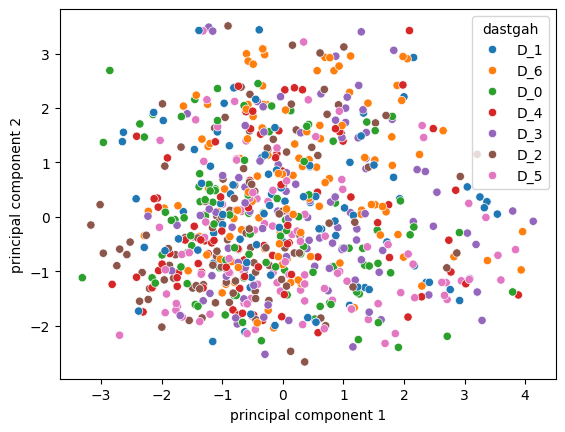

In [113]:
ax = sns.scatterplot(x =final_pca_df.iloc[:,0], y = final_pca_df.iloc[:,1],
                     hue = 'dastgah',
                     data=final_pca_df,
                     legend=True)
plt.show()

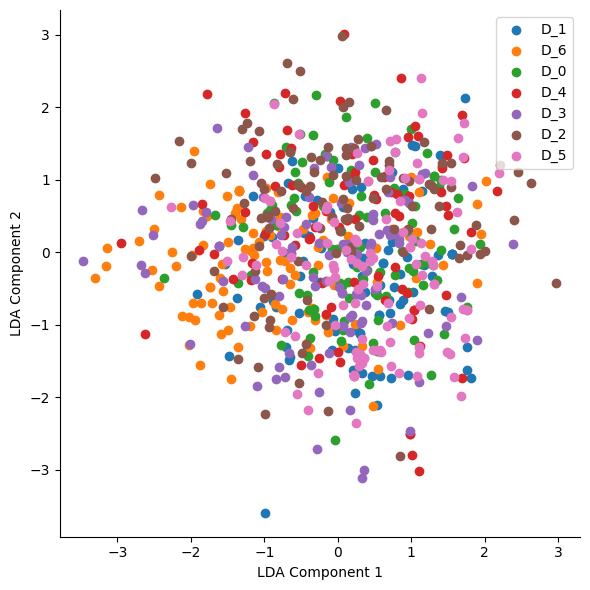

In [118]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=3)
X_train_lda = lda.fit_transform(X_train_k_best, y_train)
X_test_lda= lda.transform(X_test_k_best)
tmp_Df = pd.DataFrame (X_train_lda, columns=['LDA Component 1', 'LDA Component 2', 'LDA Component 3'])
tmp_Df['Class']=y_train
sns.FacetGrid(tmp_Df, hue ="Class",
              height=6).map(plt.scatter,
                            'LDA Component 1',
                            'LDA Component 2')
plt.legend (loc='upper right')